In [ ]:
#import libraries 
import pandas as pd
import numpy as np
from google.colab import files
#visualization
import seaborn as sns
#matplotlib inline
import matplotlib.pyplot as plt
#ML  libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
#uploading the files from local drive to google colab
uploaded = files.upload()


Saving Advertising.csv to Advertising (1).csv


In [ ]:
data =pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
data.shape

(200, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
data.isnull().sum()*100/data.shape[0]

Unnamed: 0    0.0
TV            0.0
Radio         0.0
Newspaper     0.0
Sales         0.0
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


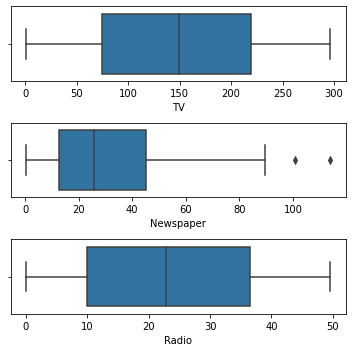

In [ ]:
#outlier analysis
fig, axs = plt.subplots(3,figsize=(5,5))
plt1=sns.boxplot(data['TV'],ax=axs[0])
plt2=sns.boxplot(data['Newspaper'],ax=axs[1])
plt3=sns.boxplot(data['Radio'],ax=axs[2])
plt.tight_layout()


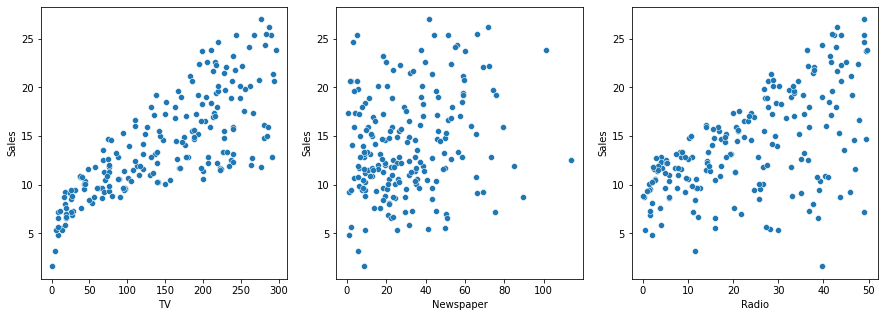

In [ ]:
#plotting the dependent variable (sales) vs independent variable 
fig=plt.figure(figsize=(15,5))
ax=plt.subplot(1,3,1)
sns.scatterplot(data=data,x='TV', y='Sales')
ax.set_ylabel('Sales')
ax=plt.subplot(1,3,2)
sns.scatterplot(data=data,x='Newspaper', y='Sales')
ax=plt.subplot(1,3,3)
sns.scatterplot(data=data,x='Radio', y='Sales')


Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

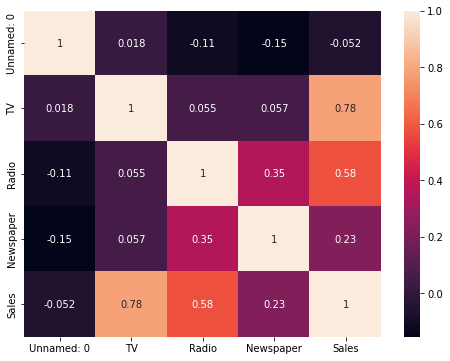

In [ ]:
#plotting correlation heat map
corr = data.corr(method = 'pearson')
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True)
data.columns

In [ ]:
#taking dependent and independent variable separate
#changing X as 2_D matrix
X=np.array(data['TV']).reshape(-1,1)
y=data['Sales']

In [ ]:
#defining the model
model=LinearRegression()

In [ ]:
#fitting the model with data
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#printing the intercepts and slope 
print('intercept of the model :', model.intercept_)
print('slope of the model :',model.coef_[0])

intercept of the model : 7.032593549127695
slope of the model : 0.04753664043301975


In [ ]:
#predicted value of y -- predicted sales value from model
y_pred=model.predict(X)


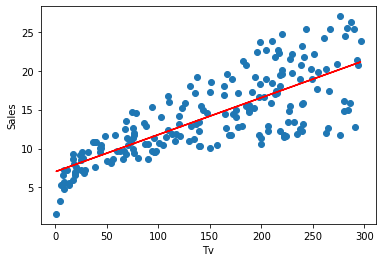

In [ ]:
#plotting regression line
plt.scatter(X,y)
plt.plot(X,y_pred,'r')
plt.xlabel('Tv')
plt.ylabel('Sales')
plt.show()

In [ ]:
#calculating the r squared
r_sq=model.score(X,y)

In [ ]:
print('R squared of the model : ',r_sq)


R squared of the model :  0.611875050850071


In [ ]:
#R SqauRED 
#meaning that 81.22% of the variance in sales is explained by tv

In [ ]:
#calculate mean sqaured error using library
MSE=mean_squared_error(y,y_pred)

In [ ]:
print('MSE calculated using libraries: ',MSE)


MSE calculated using libraries:  10.512652915656757


In [ ]:
SSE=np.square(np.subtract(y,y_pred)).sum()
MSE1=np.square(np.subtract(y,y_pred)).mean()

In [ ]:
print('SSE using mathematical calculation: ',SSE)
print('MSE using mathematical calculation: ',MSE1)

SSE using mathematical calculation:  2102.5305831313512
MSE using mathematical calculation:  10.512652915656753
